Import libraries

In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy
from skimage import morphology
import pandas as pd

Problem2 Q(i)

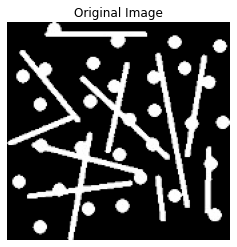

In [96]:
I = cv2.imread('circles_lines.jpg',0)
I[I<127] = 0
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I, cmap = 'gray')
ax.set_title('Original Image')
plt.show()

Perform opening to remove lines from image

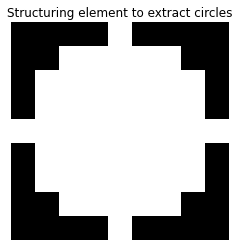

(9, 9)


In [97]:
SE = morphology.disk(4)
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(SE, cmap = 'gray')
ax.set_title('Structuring element to extract circles')
plt.show()
print(SE.shape)

Used a disk as a structuring element of radius 4. The size of the SE is (9,9)

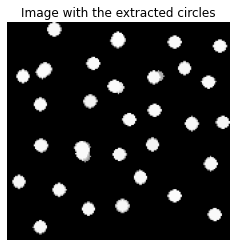

In [98]:
I_open = np.copy(I)
I_open = morphology.opening(I_open,SE)

ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I_open, cmap = 'gray')
ax.set_title('Image with the extracted circles')
plt.show()

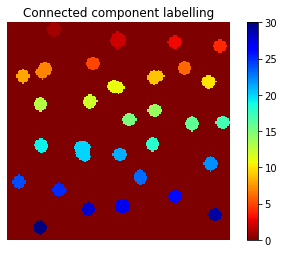

In [99]:
label,num_features = scipy.ndimage.label(I_open)
fig, ax = plt.subplots()
ax.axis('off')
im = ax.imshow(label, cmap = plt.cm.jet_r, interpolation='nearest')
ax.set_title('Connected component labelling')
fig.colorbar(im, ax=ax)

In [100]:
centroid = []
area = []   
for l in range(1,num_features+1):
    idx = np.where(label == l)
    y = sum(idx[1])/len(idx[1])
    x = sum(idx[0])/len(idx[0])
    a = len(idx[0])
    centroid.append((int(y), int(x)))
    area.append(a)

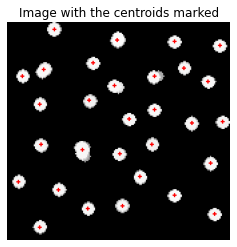

In [101]:
I_centroid = np.stack([I_open, I_open, I_open], axis=-1)
for p in centroid:
    I_centroid = cv2.circle(I_centroid, (p[0],p[1]), radius=1, color=(255, 0, 0), thickness=-1)
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I_centroid)
ax.set_title('Image with the centroids marked')
plt.show()

In [102]:
data = {};
data['Centoids'] = centroid
data['Area'] = area
pd.DataFrame(data)

,Centoids,Area
0,"(35, 5)",89
1,"(82, 13)",106
2,"(125, 14)",78
3,"(159, 17)",78
4,"(64, 30)",78
5,"(132, 34)",78
6,"(27, 35)",109
7,"(11, 40)",78
8,"(110, 40)",97
9,"(150, 44)",80


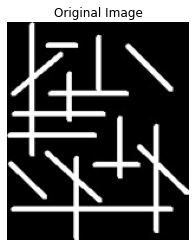

In [103]:
I = cv2.imread('lines.jpg',0)
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I, cmap = 'gray')
ax.set_title('Original Image')
plt.show()

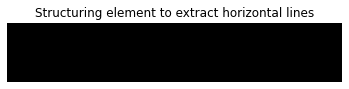

(3, 17)


In [104]:
SE = morphology.rectangle(3,17)
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(SE, cmap = 'gray')
ax.set_title('Structuring element to extract horizontal lines')
plt.show()
print(SE.shape)

Used a rectangle as a structuring element of length 17 and breadth 3. The size of the SE is (3,17)

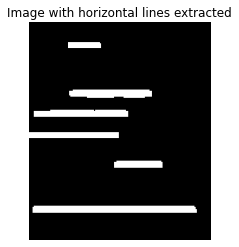

In [105]:
I_hor = I
# Extract the horizontal lines
I_hor = morphology.opening(I_hor,SE)
I_hor[I_hor>0] = 255
    
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I_hor, cmap = 'gray')
ax.set_title('Image with horizontal lines extracted')
plt.show()

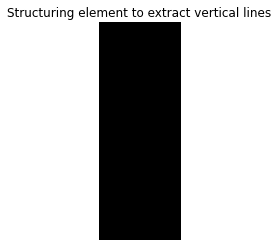

(8, 3)


In [106]:
SE = morphology.rectangle(8,3)
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(SE, cmap = 'gray')
ax.set_title('Structuring element to extract vertical lines')
plt.show()
print(SE.shape)

Used a rectangular structuring element of length 8 and width 3 to dilate the image. This was used to remove the horizontal lines completely (using mask subtraction) i.e. closing the gaps.

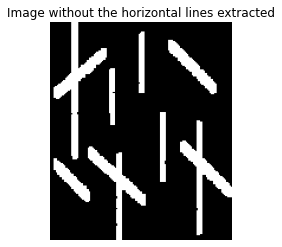

In [107]:
# Use above as a mask to remove the horizontal lines from the image
I_op = I
I_op[I_hor>0] = 0
I_op = morphology.dilation(I_op, SE)
I_op[I_op<255] = 0

ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I_op, cmap = 'gray')
ax.set_title('Image without the horizontal lines extracted')
plt.show()

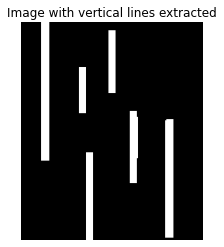

In [108]:
# Extract vertical lines from the image
SE = morphology.rectangle(10,5)
I_ver = I
# Extract the horizontal lines
I_ver = morphology.opening(I_ver,SE)
SE = morphology.rectangle(8,2)
I_ver = morphology.dilation(I_ver,SE)
I_ver[I_ver>0] = 255

ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I_ver, cmap = 'gray')
ax.set_title('Image with vertical lines extracted')
plt.show()

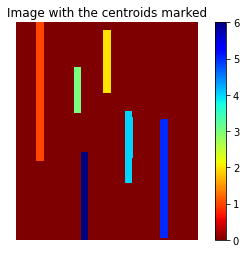

In [109]:
label,num_features = scipy.ndimage.label(I_ver)
fig, ax = plt.subplots()
ax.axis('off')
ax.set_title('Image with the centroids marked')
im = ax.imshow(label, cmap = plt.cm.jet_r, interpolation='nearest')
fig.colorbar(im, ax=ax)

In [110]:
centroid = []
length = []   
for l in range(1,num_features+1):
    mask_extract = label == l
    idx = np.where(mask_extract == True)
    y = sum(idx[1])/len(idx[1])
    x = sum(idx[0])/len(idx[0])
    centroid.append((int(y), int(x)))
    l = max(idx[0]) - min(idx[0])
    length.append(l)

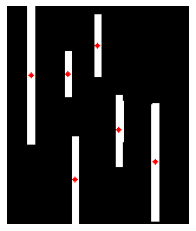

In [111]:
I_centroid = np.stack([I_ver, I_ver, I_ver], axis=-1)
for p in centroid:
    I_centroid = cv2.circle(I_centroid, (p[0],p[1]), radius=2, color=(255, 0, 0), thickness=-1)
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.imshow(I_centroid)
plt.show()

In [112]:
data = {};
data['Centoids'] = centroid
data['Length'] = length
pd.DataFrame(data)

,Centoids,Length
0,"(20, 58)",116
1,"(76, 33)",52
2,"(51, 57)",38
3,"(94, 104)",60
4,"(125, 131)",99
5,"(57, 146)",73
